In [26]:
import os
from PIL import Image
from torch.utils.data import Dataset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [12]:
directory_in_str = "111880_269359_upload_seg_train/seg_train"
directory = os.fsencode(directory_in_str)

In [53]:
images_list = []
classes = {}
for class_dir in os.listdir(directory):
    classes.setdefault(os.fsdecode(class_dir),len(classes))
    for image in os.listdir(os.path.join(directory, class_dir)):
        images_list.append((os.fsdecode(os.path.join(class_dir, image)), classes[os.fsdecode(class_dir)]))

In [54]:
images_list

[('glacier/5155.jpg', 0),
 ('glacier/14540.jpg', 0),
 ('glacier/17287.jpg', 0),
 ('glacier/10172.jpg', 0),
 ('glacier/10690.jpg', 0),
 ('glacier/3354.jpg', 0),
 ('glacier/13231.jpg', 0),
 ('glacier/12120.jpg', 0),
 ('glacier/2262.jpg', 0),
 ('glacier/5268.jpg', 0),
 ('glacier/11994.jpg', 0),
 ('glacier/13998.jpg', 0),
 ('glacier/6430.jpg', 0),
 ('glacier/16307.jpg', 0),
 ('glacier/8084.jpg', 0),
 ('glacier/15209.jpg', 0),
 ('glacier/5209.jpg', 0),
 ('glacier/8521.jpg', 0),
 ('glacier/6378.jpg', 0),
 ('glacier/12224.jpg', 0),
 ('glacier/6463.jpg', 0),
 ('glacier/8793.jpg', 0),
 ('glacier/9478.jpg', 0),
 ('glacier/5135.jpg', 0),
 ('glacier/18899.jpg', 0),
 ('glacier/2768.jpg', 0),
 ('glacier/14072.jpg', 0),
 ('glacier/9958.jpg', 0),
 ('glacier/19319.jpg', 0),
 ('glacier/15411.jpg', 0),
 ('glacier/4841.jpg', 0),
 ('glacier/1639.jpg', 0),
 ('glacier/9984.jpg', 0),
 ('glacier/9974.jpg', 0),
 ('glacier/9608.jpg', 0),
 ('glacier/503.jpg', 0),
 ('glacier/18819.jpg', 0),
 ('glacier/19377.jpg', 

In [45]:
classes

{'glacier': 0,
 'sea': 1,
 'mountain': 2,
 'street': 3,
 'forest': 4,
 'buildings': 5}

In [46]:
class Image_Dataset(Dataset):
    'Characterizes a dataset for PyTorch'
    def __init__(self, images_list, root_dir, transform=transforms.ToTensor()):
        'Initialization'
        self.images_list = images_list
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        'Denotes the total number of samples'
        return len(self.images_list)

    def __getitem__(self, index):
        'Generates one sample of data'
        image_name = self.images_list[index][0]
        label = self.images_list[index][1]
        image_name = os.path.join(self.root_dir, image_name)
        image = Image.open(image_name)
        image = self.transform(image)
        return image, label
    
    @staticmethod
    def load_images(directory_in_str, classes={}):
        directory = os.fsencode(directory_in_str)
        images_list = []
        for class_dir in os.listdir(directory):
            classes.setdefault(os.fsdecode(class_dir),len(classes))
            for image in os.listdir(os.path.join(directory, class_dir)):
                images_list.append((os.fsdecode(os.path.join(class_dir, image)), os.fsdecode(class_dir)))
        return (images_list, classes)

torch.Size([3, 150, 150])

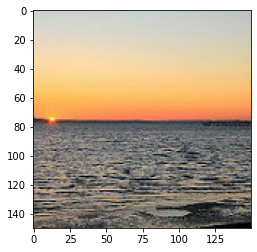

sea


In [48]:
results = transforms.ToPILImage()(dataset[3010][0])
plt.imshow(results)
plt.show()
print(dataset[3010][1])